# What is an anime, cartoon; using Nueral Networks 

## Imports

In [23]:
import os, shutil
import random

import time
import matplotlib.pyplot as plt
import scipy
import numpy as  np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
np.random.seed(75)

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import InceptionResNetV2,DenseNet121,VGG19

from keras import models
from keras import layers

import talos
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import load_model

## data

So you are free to change the structure and files. refer back to the read me for my methodology so you ahve reference but it is very straight forward.  source data is in the read me and this is the code structuring.

In [24]:
#creating folder for storage of file, wo;
main_photos= 'main_photos/'

### setting up the sub directory

train_set=os.path.join(main_photos,"train")
train_anime=os.path.join(train_set,"anime")
train_cartoon=os.path.join(train_set,"cartoon")

test_set=os.path.join(main_photos,"test")
test_anime=os.path.join(test_set,"anime")
test_cartoon=os.path.join(test_set,"cartoon")

##create said folders
os.mkdir(main_photos)

os.mkdir(train_set)
os.mkdir(train_anime)
os.mkdir(train_cartoon)

os.mkdir(test_set)
os.mkdir(test_anime)
os.mkdir(test_cartoon)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'main_photos/'

In [25]:
#for reference and to explore data
anime_set='archive/Training Data/Anime'
cartoon_set='archive/Training Data/Cartoon'

In [ ]:
currnumpic=0
imgs_anime=f'pic{currnumpic}'

for item in os.listdir(anime_set):
    loca=os.listdir(anime_set+'/'+item)
    print(loca)
    for item2 in loca:
        origin=os.path.join(anime_set+'/'+item+'/'+item2)

        shutil.copyfile(origin,train_anime+'/'+str(currnumpic)+'.png')

        print(origin+train_set)
        currnumpic+=1

        
for item in os.listdir(cartoon_set):
    loca=os.listdir(cartoon_set+'/'+item)
    print(loca)
    for item2 in loca:
        origin=os.path.join(cartoon_set+'/'+item+'/'+item2)

        shutil.copyfile(origin,train_cartoon+'/'+str(currnumpic)+'.png')

        print(origin+train_set)
        currnumpic+=1


### moving data

In [ ]:
### number of files to move and the code to do so
for file_name in random.sample(os.listdir(train_anime),300):
    shutil.move(os.path.join(train_anime,file_name),test_anime)

In [ ]:
for file_name in random.sample(os.listdir(train_cartoon),300):
    shutil.move(os.path.join(train_cartoon,file_name),test_cartoon)

## file manipulation is over, base model!

### formating images 

In [26]:
print(len(os.listdir(train_set)))

print(len(os.listdir(test_set)))

print(len(os.listdir(train_anime)))

print(len(os.listdir(test_anime)))

print(len(os.listdir(train_cartoon)))

print(len(os.listdir(test_cartoon)))

2
2
4444
310
4434
323


In [27]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_set, 
        target_size=(64, 64), batch_size = 300) 

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_set, 
        target_size=(64, 64), batch_size = 4147)

Found 633 images belonging to 2 classes.
Found 8878 images belonging to 2 classes.


In [28]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

In [29]:
test_generator2 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_set, 
        target_size=(500, 500), batch_size = 300) 

train_generator2 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_set, 
        target_size=(500, 500), batch_size = 4147)

Found 633 images belonging to 2 classes.
Found 8878 images belonging to 2 classes.


In [30]:
train_imagespic, train_labelspic = next(train_generator2)
test_imagespic, test_labelspic = next(test_generator2)

### example images 

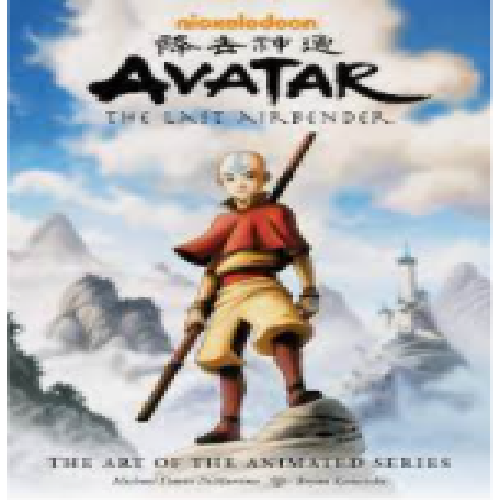

In [12]:
array_to_img(train_imagespic[50])

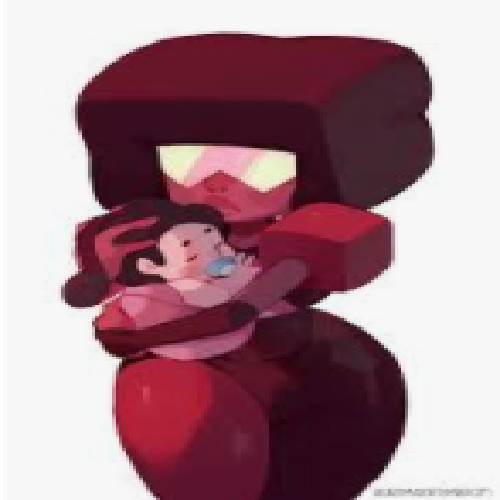

In [13]:
array_to_img(train_imagespic[301])

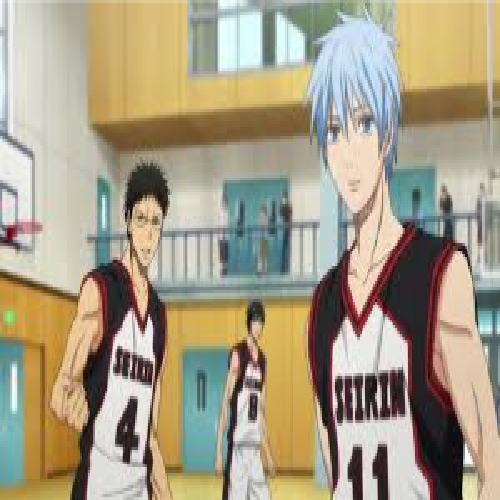

In [14]:
array_to_img(train_imagespic[91])

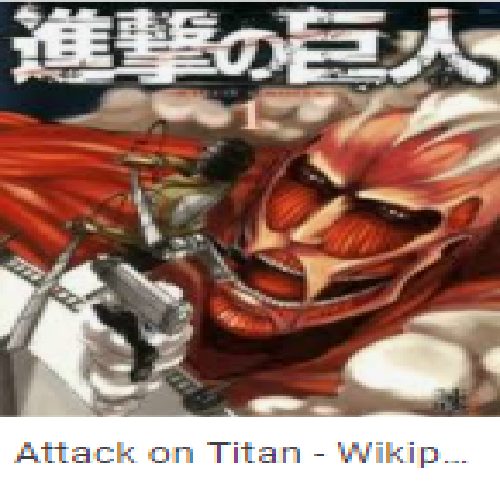

In [15]:
array_to_img(train_imagespic[1021])

### shape of data coming out

In [31]:
train_images.shape

(4147, 64, 64, 3)

In [32]:
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]


print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))

Number of training samples: 4147
Number of testing samples: 300
train_images shape: (4147, 64, 64, 3)
train_labels shape: (4147, 2)
test_images shape: (300, 64, 64, 3)
test_labels shape: (300, 2)


In [33]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)

train_y = np.reshape(train_labels[:,0], (4147,1))
test_y = np.reshape(test_labels[:,0], (300,1))

(4147, 12288)
(300, 12288)


# setting up dense model!

In [34]:
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(12288,)))
model.add(layers.Dense(1, activation='relu'))
model.add(layers.Dense(1, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [35]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

histoire = model.fit(train_img,
                    train_y,
                    epochs=100,
                    batch_size=32,
                    validation_data=(test_img, test_y))

Epoch 1/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5037 - val_loss: 0.6931 - val_accuracy: 0.5167
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5052 - val_loss: 0.6930 - val_accuracy: 0.5167
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5052 - val_loss: 0.6930 - val_accuracy: 0.5167
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5052 - val_loss: 0.6929 - val_accuracy: 0.5167
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5052 - val_loss: 0.6929 - val_accuracy: 0.5167
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5052 - val_loss: 0.6929 - val_accuracy: 0.5167
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5052 - val_loss: 0.6929 - val_accuracy: 0.5167

Epoch 58/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5052 - val_loss: 0.6929 - val_accuracy: 0.5167
Epoch 59/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5052 - val_loss: 0.6929 - val_accuracy: 0.5167
Epoch 60/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5052 - val_loss: 0.6929 - val_accuracy: 0.5167
Epoch 61/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5052 - val_loss: 0.6929 - val_accuracy: 0.5167
Epoch 62/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5052 - val_loss: 0.6929 - val_accuracy: 0.5167
Epoch 63/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5052 - val_loss: 0.6929 - val_accuracy: 0.5167
Epoch 64/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5052 - val_loss: 0.6929 - val_accuracy:

In [36]:
results_train = model.evaluate(train_img, train_y)

130/130 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5052


In [37]:
results_test = model.evaluate(test_img, test_y)

10/10 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5167


# Building CCN model

In [38]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(32, (4, 4), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [39]:
history2 = model2.fit(train_images,
                    train_y,
                    epochs=100,
                    batch_size=32,
                     validation_data=(test_images, test_y))

Epoch 1/100
130/130 [==============================] - 7s 56ms/step - loss: 0.6902 - acc: 0.5182 - val_loss: 0.6877 - val_acc: 0.5367
Epoch 2/100
130/130 [==============================] - 7s 53ms/step - loss: 0.6858 - acc: 0.5534 - val_loss: 0.6820 - val_acc: 0.5733
Epoch 3/100
130/130 [==============================] - 7s 51ms/step - loss: 0.6800 - acc: 0.5802 - val_loss: 0.6757 - val_acc: 0.5700
Epoch 4/100
130/130 [==============================] - 7s 50ms/step - loss: 0.6706 - acc: 0.6038 - val_loss: 0.6650 - val_acc: 0.5800
Epoch 5/100
130/130 [==============================] - 7s 54ms/step - loss: 0.6612 - acc: 0.6144 - val_loss: 0.6590 - val_acc: 0.5833
Epoch 6/100
130/130 [==============================] - 7s 52ms/step - loss: 0.6476 - acc: 0.6272 - val_loss: 0.6384 - val_acc: 0.6200
Epoch 7/100
130/130 [==============================] - 7s 50ms/step - loss: 0.6370 - acc: 0.6458 - val_loss: 0.6225 - val_acc: 0.6200
Epoch 8/100
130/130 [==============================] - 7s 51ms

Epoch 62/100
130/130 [==============================] - 7s 52ms/step - loss: 0.2600 - acc: 0.8958 - val_loss: 0.2956 - val_acc: 0.8767
Epoch 63/100
130/130 [==============================] - 7s 52ms/step - loss: 0.2570 - acc: 0.8961 - val_loss: 0.3660 - val_acc: 0.8733
Epoch 64/100
130/130 [==============================] - 7s 52ms/step - loss: 0.2458 - acc: 0.9050 - val_loss: 0.3274 - val_acc: 0.8467
Epoch 65/100
130/130 [==============================] - 7s 52ms/step - loss: 0.2322 - acc: 0.9091 - val_loss: 0.2924 - val_acc: 0.8867
Epoch 66/100
130/130 [==============================] - 7s 52ms/step - loss: 0.2264 - acc: 0.9081 - val_loss: 0.3602 - val_acc: 0.8500
Epoch 67/100
130/130 [==============================] - 7s 52ms/step - loss: 0.2096 - acc: 0.9228 - val_loss: 0.3711 - val_acc: 0.8267
Epoch 68/100
130/130 [==============================] - 7s 52ms/step - loss: 0.2201 - acc: 0.9168 - val_loss: 0.3073 - val_acc: 0.8667
Epoch 69/100
130/130 [==============================] -

In [40]:
results_test = model2.evaluate(train_images, train_y)

130/130 [==============================] - 2s 13ms/step - loss: 0.0108 - acc: 1.0000


In [41]:
results_test = model2.evaluate(test_images, test_y)

10/10 [==============================] - 0s 11ms/step - loss: 0.3724 - acc: 0.9033


# lets add pre trained networks

In [42]:
pretrainedincep = InceptionResNetV2(weights='imagenet', 
                 include_top=False, 
                 input_shape=(75, 75, 3))


pretraineddense = VGG19(weights='imagenet', 
                 include_top=False, 
                 input_shape=(75, 75, 3))

In [43]:
pretraineddense.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 75, 75, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 75, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 75, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 37, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 37, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 37, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 18, 128)       0     

In [44]:
PD_cnn = Sequential()
PD_cnn.add(pretraineddense)

PI_cnn = Sequential()
PI_cnn.add(pretrainedincep)

for layer in PD_cnn.layers:
    layer.trainable=False
    
for layer in PI_cnn.layers:
    layer.trainable=False

In [45]:
# checking to see it it is a flat layer
for layer in PD_cnn.layers:
    print(layer.name, layer.trainable)
for layer in PI_cnn.layers:
    print(layer.name, layer.trainable)

vgg19 False
inception_resnet_v2 False


In [46]:
PD_cnn.add(Flatten())
PD_cnn.add(Dense(132, activation='relu'))
PD_cnn.add(Dense(500, activation='relu'))
PD_cnn.add(Dense(200, activation='relu'))
PD_cnn.add(Dense(500, activation='relu'))



PD_cnn.add(Dense(1, activation='sigmoid'))

In [47]:
test_generator3 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_set, 
        target_size=(75, 75), batch_size = 300) 

train_generator3 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_set, 
        target_size=(75, 75), batch_size = 4147)

Found 633 images belonging to 2 classes.
Found 8878 images belonging to 2 classes.


In [48]:
test_images3, test_labels3 = next(test_generator3)

In [49]:
train_images3, train_labels3 = next(train_generator3)

In [50]:
train_y3 = np.reshape(train_labels3[:,0], (4147,1))
test_y3 = np.reshape(test_labels3[:,0], (300,1))

In [51]:
PD_cnn.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history3 = PD_cnn.fit(train_images3,
                    train_y3,
                    epochs=100,
                    batch_size=32,
                     validation_data=(test_images3, test_y3))

Epoch 1/100
130/130 [==============================] - 54s 418ms/step - loss: 0.6309 - accuracy: 0.6860 - val_loss: 0.5715 - val_accuracy: 0.7100
Epoch 2/100
130/130 [==============================] - 54s 418ms/step - loss: 0.5282 - accuracy: 0.7415 - val_loss: 0.5591 - val_accuracy: 0.7100
Epoch 3/100
130/130 [==============================] - 54s 418ms/step - loss: 0.4911 - accuracy: 0.7596 - val_loss: 0.4817 - val_accuracy: 0.7633
Epoch 4/100
130/130 [==============================] - 54s 418ms/step - loss: 0.4694 - accuracy: 0.7815 - val_loss: 0.4314 - val_accuracy: 0.8067
Epoch 5/100
130/130 [==============================] - 54s 418ms/step - loss: 0.4558 - accuracy: 0.7873 - val_loss: 0.4706 - val_accuracy: 0.7800
Epoch 6/100
130/130 [==============================] - 56s 432ms/step - loss: 0.4492 - accuracy: 0.7883 - val_loss: 0.4607 - val_accuracy: 0.7833
Epoch 7/100
130/130 [==============================] - 55s 426ms/step - loss: 0.4395 - accuracy: 0.8015 - val_loss: 0.4089 -

Epoch 57/100
130/130 [==============================] - 55s 426ms/step - loss: 0.2610 - accuracy: 0.8900 - val_loss: 0.3153 - val_accuracy: 0.8800
Epoch 58/100
130/130 [==============================] - 55s 426ms/step - loss: 0.2500 - accuracy: 0.8917 - val_loss: 0.3255 - val_accuracy: 0.8867
Epoch 59/100
130/130 [==============================] - 55s 425ms/step - loss: 0.2364 - accuracy: 0.8992 - val_loss: 0.3074 - val_accuracy: 0.8900
Epoch 60/100
130/130 [==============================] - 56s 427ms/step - loss: 0.2398 - accuracy: 0.9002 - val_loss: 0.3658 - val_accuracy: 0.8633
Epoch 61/100
130/130 [==============================] - 56s 428ms/step - loss: 0.2368 - accuracy: 0.8980 - val_loss: 0.5585 - val_accuracy: 0.7600
Epoch 62/100
130/130 [==============================] - 56s 431ms/step - loss: 0.2394 - accuracy: 0.8999 - val_loss: 0.3046 - val_accuracy: 0.8967
Epoch 63/100
130/130 [==============================] - 56s 428ms/step - loss: 0.2420 - accuracy: 0.9040 - val_loss: 0

In [52]:
results_test = PD_cnn.evaluate(train_images3, train_y3)

130/130 [==============================] - 52s 402ms/step - loss: 0.0738 - accuracy: 0.9752


In [53]:
results_test = PD_cnn.evaluate(test_images3, test_y3)

10/10 [==============================] - 3s 341ms/step - loss: 0.3807 - accuracy: 0.8800


In [54]:
PI_cnn.add(Flatten())
PI_cnn.add(Dense(132, activation='relu'))
PI_cnn.add(Dense(50, activation='relu'))
PI_cnn.add(Dense(75, activation='relu'))
PI_cnn.add(Dense(1, activation='sigmoid'))

In [55]:
test_generator4 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_set, 
        target_size=(75, 75), batch_size = 300) 

train_generator4 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_set, 
        target_size=(75, 75), batch_size = 4147)

Found 633 images belonging to 2 classes.
Found 8878 images belonging to 2 classes.


In [56]:
test_images4, test_labels4 = next(test_generator4)

In [57]:
train_images4, train_labels4 = next(train_generator4)

In [58]:
train_y4 = np.reshape(train_labels4[:,0], (4147,1))
test_y4 = np.reshape(test_labels4[:,0], (300,1))

In [59]:
PI_cnn.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history4 = PI_cnn.fit(train_images4,
                    train_y4,
                    epochs=100,
                    batch_size=32,
                     validation_data=(test_images4, test_y4))

Epoch 1/100
130/130 [==============================] - 36s 280ms/step - loss: 0.5594 - accuracy: 0.7222 - val_loss: 0.4838 - val_accuracy: 0.7867
Epoch 2/100
130/130 [==============================] - 33s 257ms/step - loss: 0.4698 - accuracy: 0.7842 - val_loss: 0.4535 - val_accuracy: 0.8033
Epoch 3/100
130/130 [==============================] - 32s 244ms/step - loss: 0.4343 - accuracy: 0.8076 - val_loss: 0.4317 - val_accuracy: 0.8033
Epoch 4/100
130/130 [==============================] - 32s 243ms/step - loss: 0.4054 - accuracy: 0.8189 - val_loss: 0.4113 - val_accuracy: 0.8233
Epoch 5/100
130/130 [==============================] - 33s 258ms/step - loss: 0.3812 - accuracy: 0.8305 - val_loss: 0.4102 - val_accuracy: 0.8233
Epoch 6/100
130/130 [==============================] - 34s 260ms/step - loss: 0.3622 - accuracy: 0.8421 - val_loss: 0.3959 - val_accuracy: 0.8300
Epoch 7/100
130/130 [==============================] - 34s 260ms/step - loss: 0.3370 - accuracy: 0.8519 - val_loss: 0.3721 -

Epoch 57/100
130/130 [==============================] - 30s 232ms/step - loss: 0.0039 - accuracy: 0.9995 - val_loss: 0.4651 - val_accuracy: 0.9167
Epoch 58/100
130/130 [==============================] - 30s 232ms/step - loss: 0.0038 - accuracy: 0.9995 - val_loss: 0.4620 - val_accuracy: 0.9167
Epoch 59/100
130/130 [==============================] - 30s 232ms/step - loss: 0.0036 - accuracy: 0.9995 - val_loss: 0.4656 - val_accuracy: 0.9167
Epoch 60/100
130/130 [==============================] - 31s 239ms/step - loss: 0.0035 - accuracy: 0.9995 - val_loss: 0.4684 - val_accuracy: 0.9167
Epoch 61/100
130/130 [==============================] - 30s 235ms/step - loss: 0.0034 - accuracy: 0.9995 - val_loss: 0.4662 - val_accuracy: 0.9167
Epoch 62/100
130/130 [==============================] - 30s 231ms/step - loss: 0.0033 - accuracy: 0.9998 - val_loss: 0.4735 - val_accuracy: 0.9167
Epoch 63/100
130/130 [==============================] - 30s 231ms/step - loss: 0.0032 - accuracy: 0.9998 - val_loss: 0

In [60]:
results_test = PI_cnn.evaluate(train_images4, train_y4)

130/130 [==============================] - 28s 215ms/step - loss: 0.0014 - accuracy: 0.9998


In [61]:
results_test = PI_cnn.evaluate(test_images4, test_y4)

10/10 [==============================] - 2s 185ms/step - loss: 0.5432 - accuracy: 0.9167


# Graphing training loss

In [62]:
def makelosstraining(modelob):
    if 'accuracy' in modelob.history.keys():
        training_loss = modelob.history['loss']
        test_loss = modelob.history['val_loss']

        training_acc = modelob.history['accuracy']
        test_acc = modelob.history['val_accuracy']

        # Create count of the number of epochs
        epoch_count = range(1, len(training_loss) + 1)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

        # Visualize loss history
        ax1.plot(epoch_count, training_loss, 'r--')
        ax1.plot(epoch_count, test_loss, 'b-')
        ax1.legend(['Training Loss', 'Test Loss'])

        # Visualize accuracy  history
        ax2.plot(epoch_count, training_acc, 'r--')
        ax2.plot(epoch_count, test_acc, 'b-')
        ax2.legend(['Training Accuracy', 'Test Accuracy'])

        fig.show();
    else:
        training_loss = modelob.history['loss']
        test_loss = modelob.history['val_loss']

        training_acc = modelob.history['acc']
        test_acc = modelob.history['val_acc']

        # Create count of the number of epochs
        epoch_count = range(1, len(training_loss) + 1)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

        # Visualize loss history
        ax1.plot(epoch_count, training_loss, 'r--')
        ax1.plot(epoch_count, test_loss, 'b-')
        ax1.legend(['Training Loss', 'Test Loss'])

        # Visualize accuracy  history
        ax2.plot(epoch_count, training_acc, 'r--')
        ax2.plot(epoch_count, test_acc, 'b-')
        ax2.legend(['Training Accuracy', 'Test Accuracy'])

        fig.show();

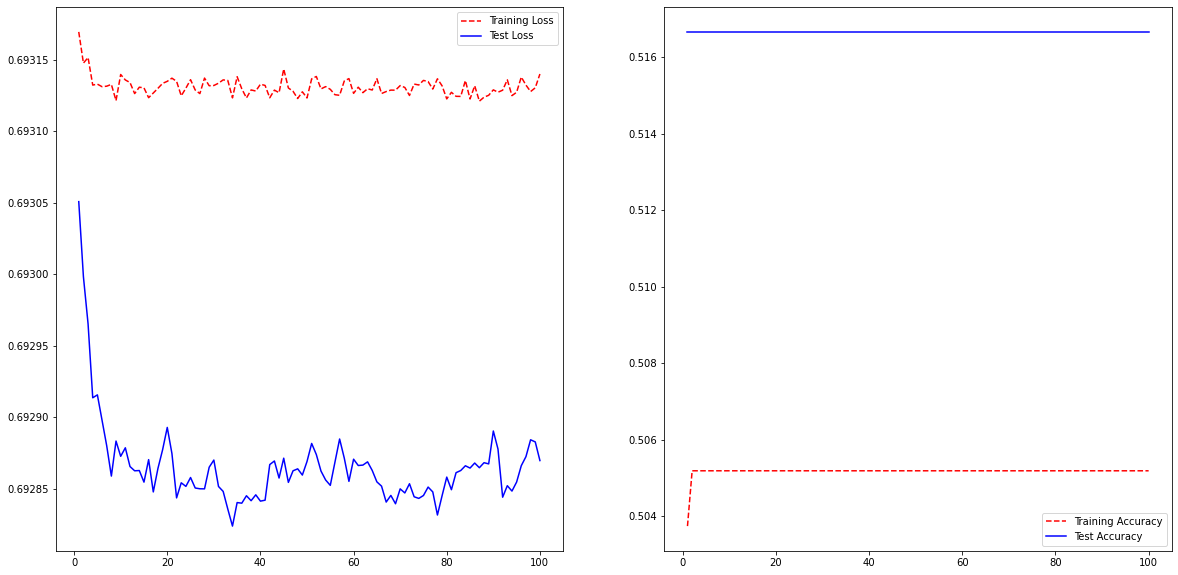

In [63]:
makelosstraining(histoire)

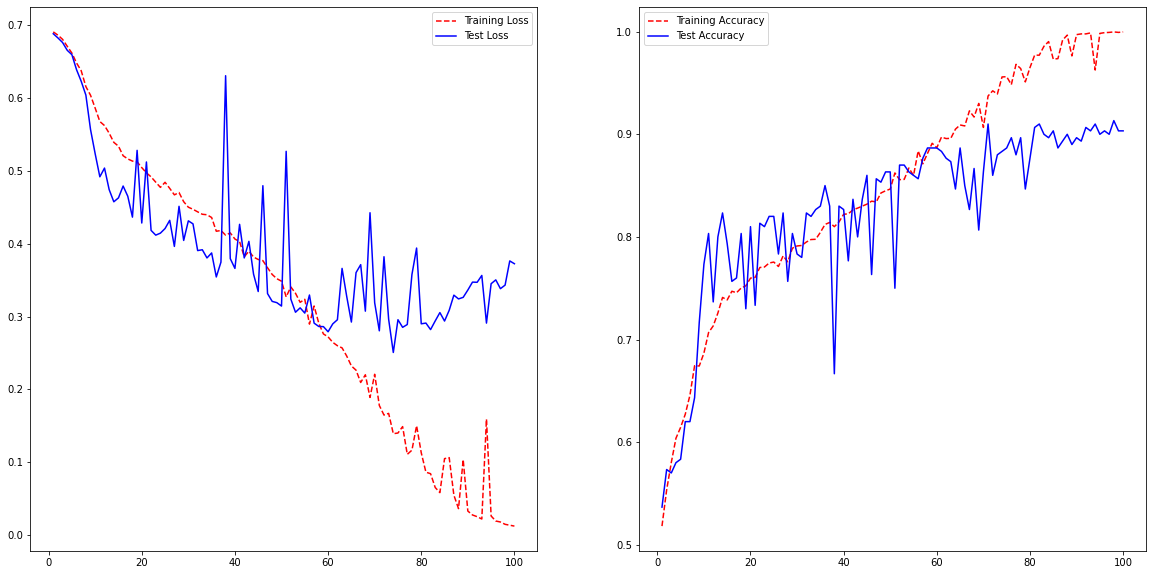

In [64]:
makelosstraining(history2)

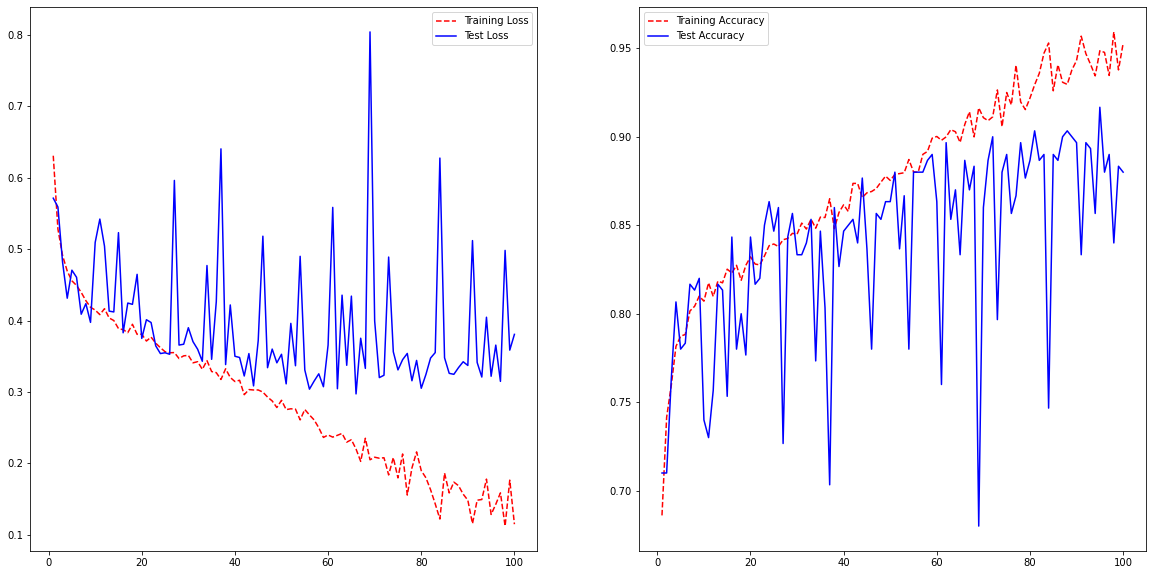

In [65]:
makelosstraining(history3)

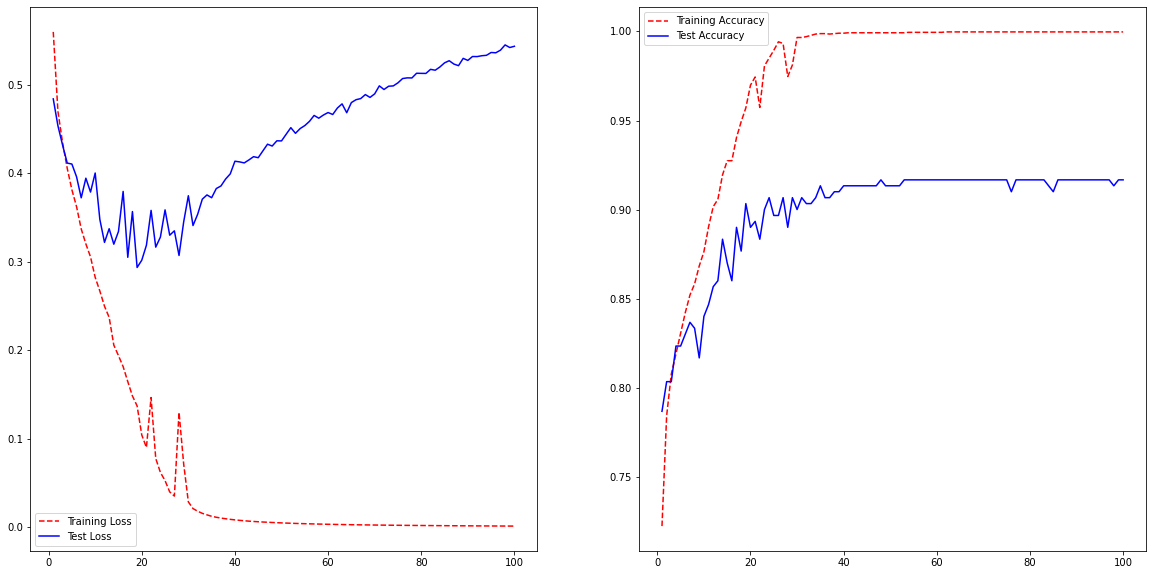

In [66]:
makelosstraining(history4)

# implementing grid search

In [67]:
def dense_network(x_train, y_train, x_test, y_test, params):

    # we build the model exactly like we would normally do it
    model = Sequential()

    # hidden layers
    
    model.add(layers.Dense(params['nodes1'], activation='relu', input_shape=(12288,)))
    model.add(layers.Dropout(params['dropout']))
    model.add(layers.Dense(params['nodes1'], activation=params['activation1'], input_shape=(12288,)))
    
    model.add(layers.Dense(params['nodes1'], activation=params['activation1']))
    model.add(layers.Dense(params['nodes1'], activation=params['activation1']))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # output layer
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=params['optimizer'], metrics=['accuracy'])
    
    out = model.fit(x_train, y_train, 
                        validation_data=(x_test, y_test),
                        batch_size=50,
                        epochs=100,
                        verbose=0)

    return out, model

In [68]:
params = {'dropout': [0.1, 0.3, 0.5], 
          'nodes1': [100, 200, 500],
          'optimizer': ['adam', 'sgd'], #,'Adagrad','Adamax' 
          'activation1': ['relu', 'tanh'], #,'selu'
          'activation2': ['relu', 'tanh']}

In [69]:
results = talos.Scan(train_img, train_y, params=params, model=dense_network, experiment_name='grid')

100%|██████████| 72/72 [1:38:42<00:00, 82.26s/it] 


In [70]:
results.best_model(metric='accuracy')

In [71]:
pd.read_csv('grid/111121195816.csv').sort_values('val_accuracy', ascending=False)

round_epochs      loss  accuracy  val_loss  val_accuracy activation1  \
39           100  0.653634  0.645072  0.700199      0.525301        tanh   
47           100  0.590936  0.718470  0.706454      0.518072        tanh   
61           100  0.644454  0.635768  0.713959      0.518072        tanh   
9            100  0.668681  0.620951  0.697547      0.517269        relu   
37           100  0.636784  0.664025  0.713970      0.517269        tanh   
..           ...       ...       ...       ...           ...         ...   
21           100  0.625498  0.671606  0.803649      0.488353        relu   
17           100  0.686342  0.550655  0.697478      0.486747        relu   
49           100  0.646202  0.651620  0.708507      0.485141        tanh   
57           100  0.627040  0.657822  0.722933      0.475502        tanh   
15           100  0.685493  0.544452  0.696986      0.474699        relu   

   activation2  dropout  nodes1 optimizer  
39        relu      0.1     200       sgd  
47        relu      0.3     500       sgd  
61        tanh      0.3     100       sgd  
9         relu      0.3     200       sgd  
37        relu      0.1     100       sgd  
..         ...      ...     ...       ...  
21        tanh      0.1     200       sgd  
17        relu      0.5     500       sgd  
49        relu      0.5     100       sgd  
57        tanh      0.1     200       sgd  
15        relu      0.5     200       sgd  

[72 rows x 10 columns]